In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [3]:
df.shape

(506, 14)

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


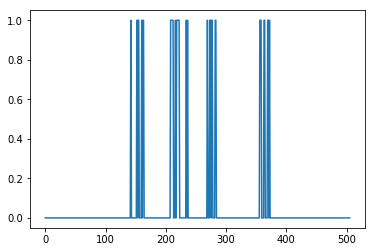

In [7]:
df['chas'].plot()

In [8]:
# For this dataset there are no categoricals or dates that we have to deal with

In [9]:
y = df['medv']

In [10]:
X = df.drop(['medv'], axis=1)

In [11]:
df.shape, X.shape, y.shape

((506, 14), (506, 13), (506,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
def score(model):
    model.fit(X_train, y_train)
    
    for X, y in ((X_train, y_train), (X_test, y_test)):
        y_predict = model.predict(X)
        rmse = (np.sqrt(mean_squared_error(y, y_predict)))
        r2 = r2_score(y, y_predict)
    
        if hasattr(model, 'oob_score_'):
            print(rmse, r2, m.oob_score_)
    
        else:
            print(rmse, r2)

In [15]:
score(lin_model)

4.6520331848801675 0.7508856358979672
4.928602182665353 0.6687594935356298


In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
score(m)

1.6719605199280334 0.9678215442602757
2.908798013330067 0.8846219911516743


In [18]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1)
score(m)

1.388453482037543 0.977809053326735
2.971843761562383 0.8795663476977729


In [19]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
score(m)

1.3752339422947664 0.9782296040837057 0.84659049715405
2.8704550913352653 0.8876437014934951 0.84659049715405


In [20]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, min_samples_leaf=2)
score(m)

1.891945676191144 0.9587968436399587 0.8282449571721829
3.2175156790538493 0.8588316775867838 0.8282449571721829


In [21]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, min_samples_leaf=2, max_features=0.8)
score(m)

1.8098926441401597 0.9622932768973658 0.8445795670397728
3.0306448653891835 0.8747533823527157 0.8445795670397728


In [22]:
# Subsampling

In [23]:
# Feature importance